# Model Building Test Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from math import sqrt
from sklearn.feature_selection import RFECV

%matplotlib inline

In [13]:
merged_test = pd.read_pickle("merged_test-processed.pkl")

In [14]:
cols = merged_test.columns[1:]
cols

Index(['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age',
       'Term', 'TotalContractValue', 'DaysLate', 'ExpectedTerm',
       'rateTypeEntity_DAILY', 'rateTypeEntity_MONTHLY',
       'rateTypeEntity_WEEKLY', 'MainApplicantGender_Female',
       'MainApplicantGender_Male', 'Region_Coast Region',
       'Region_Mount Kenya Region', 'Region_Nairobi Region',
       'Region_North Rift', 'Region_Nyanza', 'Region_South Rift',
       'Region_Western', 'Occupation_Business',
       'Occupation_Driver/Motorbike Rider', 'Occupation_Farmer',
       'Occupation_Government Employee', 'Occupation_Labourer',
       'Occupation_Other', 'Occupation_Teacher', 'TotalPastPayments',
       'NumPayments', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
       '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
       '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
 

In [15]:
targets = ["m1","m2","m3","m4","m5","m6"]

In [16]:
scaler = StandardScaler()
df_test = pd.DataFrame(scaler.fit_transform(merged_test.loc[:,cols]), columns=cols)
df_test.head()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,DaysLate,ExpectedTerm,rateTypeEntity_DAILY,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,-0.842066,-0.146542,-0.276282,0.643031,-0.523331,-0.397855,-0.810529,3.419733,2.788939,0.074113,...,-0.55967,-0.692768,-0.548251,-0.635471,-0.572108,-0.393874,-0.461006,-0.409588,-0.35798,-0.307128
1,-0.842066,-0.146542,-0.276282,0.643031,0.327604,-0.397855,-0.810529,-1.130325,-1.118892,0.074113,...,-0.55967,-0.692768,-0.548251,-0.635471,-0.572108,-0.393874,-0.461006,-0.409588,-0.35798,-0.307128
2,-0.842066,-0.146542,-0.276282,0.643031,-0.614207,-0.397855,-0.810529,3.642916,2.980620,0.074113,...,-0.55967,-0.692768,-0.548251,-0.635471,-0.572108,-0.393874,-0.461006,-0.409588,-0.35798,-0.307128
3,-0.842066,-0.146542,-0.276282,0.643031,0.294558,-0.397855,-0.810529,-0.536369,-0.605680,0.074113,...,-0.55967,-0.692768,-0.548251,-0.635471,-0.572108,-0.393874,-0.461006,-0.409588,-0.35798,-0.307128
4,-0.842066,-0.146542,-0.276282,0.643031,-0.068948,-0.397855,-0.810529,-0.899942,-0.921027,0.074113,...,-0.55967,-0.692768,-0.548251,-0.635471,-0.572108,-0.393874,-0.461006,-0.409588,-0.35798,-0.307128


In [17]:
pca = PCA()

In [18]:
pc_scores = pca.fit_transform(df_test)

In [19]:
PC_NUMBERS = np.arange(1, df_test.shape[1]+1)
PC_LABELS = ['PC'+str(i) for i in PC_NUMBERS]

In [20]:
pc_scores = pd.DataFrame(pc_scores, columns=PC_LABELS)
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91
0,-4.177156,33.147519,6.486710,-16.074707,3.301369,-0.700736,-1.590791,2.838594,-7.000685,-2.635430,...,0.075920,-0.612482,-0.017591,0.009676,-0.012372,-5.799627e-14,-6.193824e-15,-5.161476e-15,-3.694558e-15,-4.742508e-15
1,-5.220320,39.667259,7.327458,-20.722412,0.934956,0.386182,1.437404,0.119282,-13.312586,-1.028526,...,0.206568,0.399669,-0.004400,0.008925,0.007156,1.533748e-14,-6.825170e-15,6.914162e-16,2.677561e-15,3.607011e-15
2,-3.674814,23.714276,3.770785,22.653403,0.956132,-0.568225,-1.689982,-0.352398,11.674830,-3.097880,...,-0.029429,-0.946676,0.013500,-0.040344,-0.048477,6.392271e-14,3.693223e-14,1.163883e-15,1.130809e-15,-4.921908e-16
3,-6.581156,75.600299,14.887075,-11.040034,2.888527,0.256043,-1.524471,-4.406658,34.097141,3.207243,...,-0.351275,0.087220,0.046092,-0.036370,0.017909,4.092208e-14,1.145574e-14,3.232214e-15,-2.659054e-15,-5.405631e-15
4,-5.539050,49.403097,9.533239,-21.289491,1.595168,0.261953,0.694025,-0.302186,-4.914607,0.324100,...,-0.132833,-1.960519,0.034155,-0.007476,0.019444,-1.568382e-14,2.124714e-15,-1.406279e-15,-1.924034e-15,-2.892081e-15


In [21]:
variance_explained = pd.DataFrame(
    {
        'PC': PC_NUMBERS,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained["Cumulative"] = variance_explained.Proportion.cumsum()

Text(0.5, 1.0, 'Scree Plot')

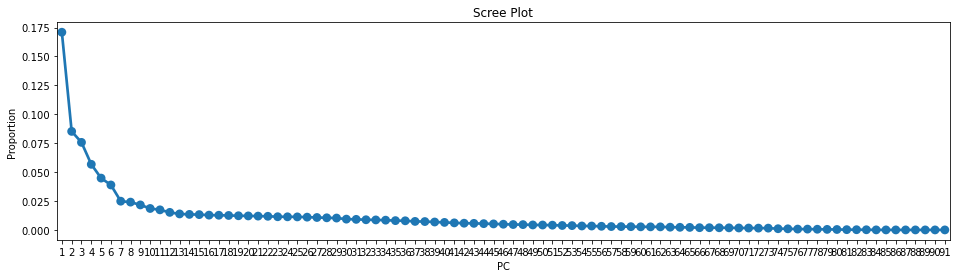

In [22]:
    plt.figure(figsize=(16, 4))
    sns.pointplot(
        x="PC", y="Proportion",
        data=variance_explained
    ).set_title('Scree Plot')

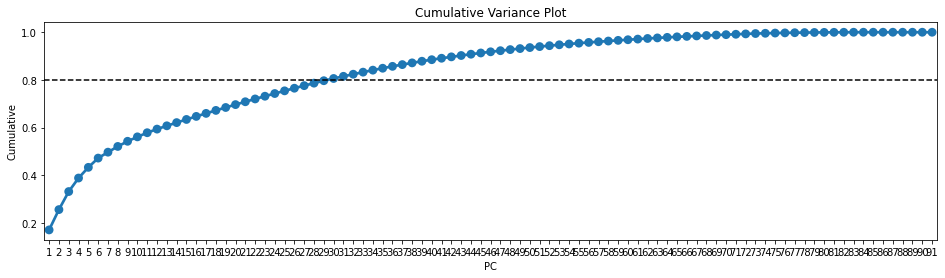

In [23]:
plt.figure(figsize=(16, 4))
plot = sns.pointplot(
    x="PC", y="Cumulative",
    data=variance_explained
)
plot.set_title('Cumulative Variance Plot')
plot.axhline(0.80, color = "black", linestyle='--')

In [24]:
X_test = pc_scores.iloc[:,:20]
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.177156,33.147519,6.486710,-16.074707,3.301369,-0.700736,-1.590791,2.838594,-7.000685,-2.635430,0.163263,1.199189,-0.495177,-1.927826,-0.083840,0.005279,0.385054,-0.979954,2.002790,2.056705
1,-5.220320,39.667259,7.327458,-20.722412,0.934956,0.386182,1.437404,0.119282,-13.312586,-1.028526,0.679719,0.303479,-0.939607,0.882511,-1.020078,1.257277,2.919497,-0.387511,2.875552,5.071180
2,-3.674814,23.714276,3.770785,22.653403,0.956132,-0.568225,-1.689982,-0.352398,11.674830,-3.097880,0.356802,1.096927,-2.543917,1.816084,1.705986,4.301792,6.979126,-2.063184,13.078155,27.393296
3,-6.581156,75.600299,14.887075,-11.040034,2.888527,0.256043,-1.524471,-4.406658,34.097141,3.207243,-0.386653,-0.579292,1.853228,-0.317580,-0.582082,-3.139113,-3.585450,1.830151,-6.758862,-11.705135
4,-5.539050,49.403097,9.533239,-21.289491,1.595168,0.261953,0.694025,-0.302186,-4.914607,0.324100,0.001381,0.131659,0.411063,-0.276607,-0.025662,-0.289820,-0.755384,-0.203319,-0.509981,-1.337834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,-3.473695,-1.182944,3.758282,0.129505,0.027568,0.174557,-2.634129,-0.832731,-0.389014,0.623458,-0.485506,0.683053,0.425500,1.672908,1.422747,0.238418,-0.747350,0.449206,-0.649609,0.315928
9332,-3.575831,-1.134750,4.574610,-0.105042,-1.176778,0.712482,-1.273774,0.382240,-0.175348,0.955038,0.902487,-0.447049,0.060450,-1.037725,1.205511,0.248861,-0.863519,-0.212689,-1.187569,-0.201240
9333,-3.397019,-0.837580,2.386883,0.072711,-0.550025,0.053510,-1.677309,0.121219,-0.118664,1.024240,-1.597570,1.047052,-0.799998,0.671581,-0.535222,1.497906,-0.592554,-0.723309,-0.006802,-0.065220
9334,-3.566054,-1.022308,3.103474,0.038602,-0.835461,0.471729,-1.027259,-0.248147,-0.023904,-1.085707,1.341469,-0.030307,0.585942,1.717417,-0.053245,-0.256149,-0.115862,0.064045,-0.451203,-0.424940


In [25]:
X_test.to_pickle("X_test.pkl")